In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset = pd.read_csv('Training.csv')
dataset.fillna(0)
X = dataset.iloc[:, 0:132].values
y = dataset.iloc[:,-1].values

dataset2 = pd.read_csv('Testing.csv')
X_test = dataset2.iloc[:, 0:132].values
y_test = dataset2.iloc[:,-1].values

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN

In [ ]:
maxAccuracy=0
maxModel=0
while(maxAccuracy<0.95):
    # train a Boosted Decision tree model to predict classes
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    
    # this will create 200 weak learner decision trees and use them to build a strong classifier
    boosted = AdaBoostClassifier( DecisionTreeClassifier( max_depth = 6,max_leaf_nodes=4), algorithm="SAMME", n_estimators=300 )
    model = boosted.fit( X, y )
    
    Y_pred = model.predict( X_test )
    #Y_probas = model.predict_proba( X_test )
    
    def scoreModel( Y_test, Y_pred ):
        # show accuracy, precision and recall
        from sklearn.metrics import accuracy_score
        score = accuracy_score( Y_test, Y_pred )
        print( "Accuracy: %.3f " % round( score, 3 ) )
        Accuracy=score   
        return round(Accuracy,2)
    
    temp=scoreModel( y_test, Y_pred )
    if(maxAccuracy< temp):
        maxAccuracy=temp
        maxModel=model


Accuracy: 0.976 


In [ ]:
import pickle
pickle.dump(model,open('models.dot','wb'))

In [ ]:
model=pickle.load(open('models.txt','rb'))
texts = ['I have been having difficulty in swallowing food no matter how soft the food item is.',
        'My hands shiver when i stretch them.','I am having difficulty in digesting milk products, like curd.',
        'I have been suffering from cough from a few days, and blood comes out of my mouth whenever i cough.',
        'fatigue swollen blood vescels yellow eyes and skin fluid in abdomen',
        'the vein on the side of my neck has started to bulge in the past few days',
        'i am losing control on what i am saying. i am unable to speak what i think. the words and sentences either come out disorganised or completely different',
        'chest pain breathing pain cough blood fatigue fever loss of appetite excessive sweating loss of muscle shortness of breath swollen lymph nodes',
        'i have been having high fever from past three day',
        'severe flu illness fever painfull headache skin rash muscle pain vomitting joint pain nausea excessive bleeding death',
        'there have been instances in the past few days when i have almost become unconscious and am unable to sense anything'
       ]
col=dataset.columns[0:132]
cols=list()
ps = PorterStemmer()
words=list()
for i in range(len(col)):
    temp=col[i].split('_')
    temp2=list()
    for word in temp:
        if not word in set(stopwords.words('english')):
            temp2.append(ps.stem(word))
    words+=temp2
    cols.append(temp2)
wordSet=set(words)
print(words)
print(wordSet)
wordDict=dict()
for y in wordSet:
  count=[i for i, x in enumerate(words) if x == y]
  count=len(count)
  wordDict[y]=1/count
print(wordDict)

['itch', 'skin', 'rash', 'nodal', 'skin', 'erupt', 'continu', 'sneez', 'shiver', 'chill', 'joint', 'pain', 'stomach', 'pain', 'acid', 'ulcer', 'tongu', 'muscl', 'wast', 'vomit', 'burn', 'micturit', 'spot', 'urin', 'fatigu', 'weight', 'gain', 'anxieti', 'cold', 'hand', 'feet', 'mood', 'swing', 'weight', 'loss', 'restless', 'lethargi', 'patch', 'throat', 'irregular', 'sugar', 'level', 'cough', 'high', 'fever', 'sunken', 'eye', 'breathless', 'sweat', 'dehydr', 'indigest', 'headach', 'yellowish', 'skin', 'dark', 'urin', 'nausea', 'loss', 'appetit', 'pain', 'behind', 'eye', 'back', 'pain', 'constip', 'abdomin', 'pain', 'diarrhoea', 'mild', 'fever', 'yellow', 'urin', 'yellow', 'eye', 'acut', 'liver', 'failur', 'fluid', 'overload', 'swell', 'stomach', 'swell', 'lymph', 'node', 'malais', 'blur', 'distort', 'vision', 'phlegm', 'throat', 'irrit', 'red', 'eye', 'sinu', 'pressur', 'runni', 'nose', 'congest', 'chest', 'pain', 'weak', 'limb', 'fast', 'heart', 'rate', 'pain', 'bowel', 'movement', 'pa

In [ ]:
for inp in texts:
  print(inp)
  inputWords=inp.split(' ')
  temp2=list()
  for word in inputWords:
    if not word in set(stopwords.words('english')):
      temp2.append(ps.stem(word))
  inputWords=temp2
  print(inputWords)
  colWeight=[0 for i in range(len(cols))]
  
  for index,value in enumerate(cols):
    for x in set(inputWords):
      if x in value:
        colWeight[index]+=round(wordDict[x],2)
  print('COLWEIGHT')
  print(colWeight)
  print(sum(colWeight))
  
  workArr=list()
  
  for i in colWeight:
    if(i>=0.1):
      workArr.append(1)
    else:
      workArr.append(0)
  print('WORKARR')
  print(workArr)
  print(sum(workArr))
  
  if(sum(colWeight)<sum(workArr)):
    tempPred=model.predict([workArr])
    print(tempPred)
  else:
    print('Not able to diagnose. Please describe more')
  print('*'*30)

I have been having difficulty in swallowing food no matter how soft the food item is.
['I', 'difficulti', 'swallow', 'food', 'matter', 'soft', 'food', 'item', 'is.']
COLWEIGHT
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
WORKARR
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
Not able to diagno

In [ ]:
for inp in texts:
    print(inp)
    arr=inp.split(' ')
    temp2=list()
    for word in arr:
        if not word in set(stopwords.words('english')):
            temp2.append(ps.stem(word))
    splitarr=[]
    for i in cols:
        temp=0
        for x in i:
            if(x in temp2):
                temp=1
        splitarr.append(temp)
    print(splitarr)
    if (sum(splitarr)>3):
        tempPred=model.predict([splitarr])
        print(tempPred)
    else:
        print('No matching disease. Describe further')
    #print("Accuracy= ",maxAccuracy)
    print('*'*30)

I have been having difficulty in swallowing food no matter how soft the food item is.
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
No matching disease. Describe further
******************************
My hands shiver when i stretch them.
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
No matching di

In [ ]:
dataset.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet
synonyms=list()
for x in wordSet:
  temp=list()
  for syn in wordnet.synsets(x): 
    for l in syn.lemmas(): 
       synonyms.append(l.name())
print(set(synonyms))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
{'vomit_up', 'deep-set', 'revolting', 'substance', 'marijuana_cigarette', 'support', 'peel_off', 'post', 'flavor', 'fire', 'voice_communication', 'pocket-sized', 'contaminate', 'jive', 'feel', 'flush', 'get_hold_of', 'cherry', 'thrill', 'raw', 'keen', 'nighttime', "actor's_line", 'foot', 'pull_down', 'junction', 'wampum', 'garble', 'depend', 'strain', 'regurgitate', 'well_up', 'frigid', 'bang-up', 'scramble', 'nick', 'tan', 'philia', 'grim', 'mild', 'frail', 'raise_up', 'non-white', 'intumesce', 'hemorrhage', 'tell_apart', 'release', 'special', 'physical_contact', 'matchless', 'surplusage', 'visual_sense', 'foundation', 'defecate', 'ass', 'redness', 'gall', 'smear', 'halter', 'spliff', 'swollen', 'tooshie', 'dandy', 'lecture', 'sudate', 'pinpoint', 'origin', 'just_about', 'sass', 'boodle', 'tactile_property', 'high_up', 'burn_up', 'spine', 'puke', 'front', 'hungriness', 'p

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
inp=list()
score=list()
inp1=list()
score1=list()
inp2=list()
score2=list()
inp3=list()
score3=list()
for i in range(2,15):
  boosted = DecisionTreeClassifier( max_depth = i,max_leaf_nodes=10)
  boosted1 = DecisionTreeClassifier( max_depth = 10,max_leaf_nodes=i)
  boosted2 =AdaBoostClassifier( DecisionTreeClassifier( max_depth = i,max_leaf_nodes=10), algorithm="SAMME", n_estimators=300 )
  boosted3 =AdaBoostClassifier( DecisionTreeClassifier( max_depth = 10,max_leaf_nodes=i), algorithm="SAMME", n_estimators=300 )
  model = boosted.fit( X, y )
  model1 = boosted1.fit( X, y )
  model2 = boosted2.fit( X, y )
  model3 = boosted3.fit( X, y )
  Y_pred = model.predict( X_test )
  Y_pred1 = model1.predict( X_test )
  Y_pred2 = model2.predict( X_test )
  Y_pred3 = model3.predict( X_test )
  def scoreModel( Y_test, Y_pred ):
      # show accuracy, precision and recall
      from sklearn.metrics import accuracy_score
      score = accuracy_score( Y_test, Y_pred )
      Accuracy=score   
      return round(Accuracy,2)
  temp=scoreModel( y_test, Y_pred )
  inp.append(i)
  score.append(temp)
  temp=scoreModel( y_test, Y_pred1 )
  inp1.append(i)
  score1.append(temp)
  temp=scoreModel( y_test, Y_pred2 )
  inp2.append(i)
  score2.append(temp)
  temp=scoreModel( y_test, Y_pred3 )
  inp3.append(i)
  score3.append(temp)

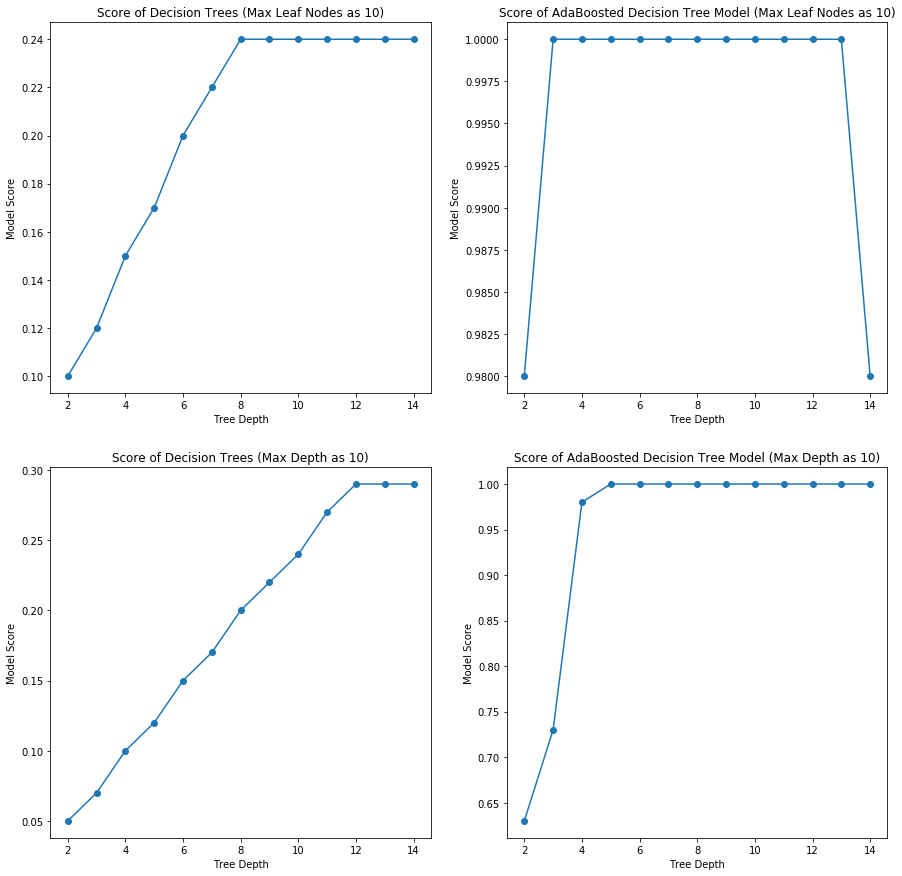

In [ ]:
a=plt.figure(figsize=(15,15))
ax=a.add_subplot(221)
ax.plot(inp,score,marker='o',linestyle='solid')
ax.set_xlabel('Tree Depth')
ax.set_ylabel('Model Score')
ax.set_title('Score of Decision Trees (Max Leaf Nodes as 10)')

ax1=a.add_subplot(222)
ax1.plot(inp2,score2,marker='o',linestyle='solid')
ax1.set_xlabel('Tree Depth')
ax1.set_ylabel('Model Score')
ax1.set_title('Score of AdaBoosted Decision Tree Model (Max Leaf Nodes as 10)')

ax2=a.add_subplot(223)
ax2.plot(inp1,score1,marker='o',linestyle='solid')
ax2.set_xlabel('Tree Depth')
ax2.set_ylabel('Model Score')
ax2.set_title('Score of Decision Trees (Max Depth as 10)')

ax3=a.add_subplot(224)
ax3.plot(inp3,score3,marker='o',linestyle='solid')
ax3.set_xlabel('Tree Depth')
ax3.set_ylabel('Model Score')
ax3.set_title('Score of AdaBoosted Decision Tree Model (Max Depth as 10)')

plt.savefig('comparison.png')

In [ ]:
plt.subplot(2,2,1,squeeze=False)
plt.plot(inp,score,marker='o',linestyle='solid')
plt.xlabel('Tree Depth')
plt.ylabel('Model Score')
plt.title('Score of Decision Trees (Max Leaf Nodes as 10)')

plt.subplot(2,2,2,squeeze=False)
plt.plot(inp2,score,marker='o',linestyle='solid')
plt.xlabel('Tree Depth')
plt.ylabel('Model Score')
plt.title('Score of AdaBoosted Decision Tree Model (Max Leaf Nodes as 10)')

plt.subplot(2,2,3,squeeze=False)
plt.plot(inp1,score,marker='o',linestyle='solid')
plt.xlabel('Tree Depth')
plt.ylabel('Model Score')
plt.title('Score of Decision Trees (Max Depth as 10)')

plt.subplot(2,2,4,squeeze=False)
plt.plot(inp3,score,marker='o',linestyle='solid')
plt.xlabel('Tree Depth')
plt.ylabel('Model Score')
plt.title('Score of AdaBoosted Decision Tree Model (Max Depth as 10)')

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0.05, 0.07, 0.1, 0.12, 0.15, 0.17, 0.2, 0.22, 0.24, 0.27, 0.29, 0.29, 0.29]


Text(0.5, 1.0, 'Score of Decision Trees (Max Depth as 10)')

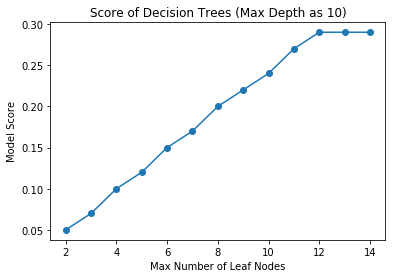

In [ ]:
  from sklearn.tree import DecisionTreeClassifier
inp=list()
score=list()
for i in range(2,15):
  boosted = DecisionTreeClassifier( max_depth = 10,max_leaf_nodes=i)
  model = boosted.fit( X, y )
  Y_pred = model.predict( X_test )
  def scoreModel( Y_test, Y_pred ):
      # show accuracy, precision and recall
      from sklearn.metrics import accuracy_score
      score = accuracy_score( Y_test, Y_pred )
      Accuracy=score   
      return round(Accuracy,2)
  temp=scoreModel( y_test, Y_pred )
  inp.append(i)
  score.append(temp)
print(inp)
print(score)
plt.plot(inp,score,marker='o',linestyle='solid')
plt.xlabel('Max Number of Leaf Nodes')
plt.ylabel('Model Score')
plt.title('Score of Decision Trees (Max Depth as 10)')

[2, 3, 4, 5, 6, 7, 8, 9]
[0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'Score of Decision Trees (Max Leaf Nodes as 10)')

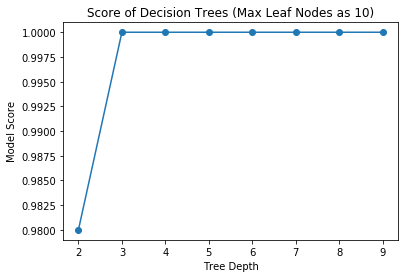

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
inp=list()
score=list()
for i in range(2,10):
  boosted = AdaBoostClassifier( DecisionTreeClassifier( max_depth = i,max_leaf_nodes=10), algorithm="SAMME", n_estimators=300 )
  model = boosted.fit( X, y )
  Y_pred = model.predict( X_test )
  def scoreModel( Y_test, Y_pred ):
      # show accuracy, precision and recall
      from sklearn.metrics import accuracy_score
      score = accuracy_score( Y_test, Y_pred )
      Accuracy=score   
      return round(Accuracy,2)
  temp=scoreModel( y_test, Y_pred )
  inp.append(i)
  score.append(temp)
print(inp)
print(score)
plt.plot(inp,score,marker='o',linestyle='solid')
plt.xlabel('Tree Depth')
plt.ylabel('Model Score')
plt.title('Score of Decision Trees (Max Leaf Nodes as 10)')  

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0.51, 0.83, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'Score of Decision Trees (Max Leaf Nodes as 10)')

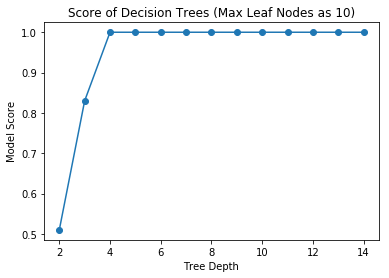

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
inp=list()
score=list()
for i in range(2,15):
  boosted = AdaBoostClassifier( DecisionTreeClassifier( max_depth = 10,max_leaf_nodes=i), algorithm="SAMME", n_estimators=300 )
  model = boosted.fit( X, y )
  Y_pred = model.predict( X_test )
  def scoreModel( Y_test, Y_pred ):
      # show accuracy, precision and recall
      from sklearn.metrics import accuracy_score
      score = accuracy_score( Y_test, Y_pred )
      Accuracy=score   
      return round(Accuracy,2)
  temp=scoreModel( y_test, Y_pred )
  inp.append(i)
  score.append(temp)
print(inp)
print(score)
plt.plot(inp,score,marker='o',linestyle='solid')
plt.xlabel('Tree Depth')
plt.ylabel('Model Score')
plt.title('Score of Decision Trees (Max Leaf Nodes as 10)')  